In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **1.Dataset Selection**

In [ ]:
df = pd.read_csv('Furniture.csv')

In [ ]:
df

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,category,material,color,location,season,store_type,brand,revenue
0,218.543053,181.610932,40,16.899243,105,27.796433,9,Bed,Plastic,Red,Rural,Spring,Online,BrandA,3949.165238
1,477.821438,385.033827,7,19.418888,192,26.943715,6,Chair,Glass,Blue,Rural,Summer,Online,BrandD,-3521.002258
2,379.397274,276.736765,32,27.058842,59,21.948130,2,Table,Metal,Black,Suburban,Fall,Online,BrandD,14285.560219
3,319.396318,281.841334,48,11.758114,45,11.009944,2,Table,Glass,Green,Rural,Summer,Retail,BrandD,12261.073703
4,120.208388,69.743681,19,41.981019,35,3.183763,9,Chair,Glass,Brown,Rural,Fall,Online,BrandD,-4588.255733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,Chair,Metal,White,Suburban,Fall,Retail,BrandB,-3351.943350
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,Bed,Glass,Red,Urban,Summer,Retail,BrandD,-445.621346
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,Desk,Fabric,Red,Rural,Summer,Online,BrandD,25809.096038
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,Desk,Metal,Black,Suburban,Fall,Retail,BrandA,18963.246944


**Source**: https://www.kaggle.com/datasets/rajagrawal7089/furniture-sales-data?resource=download

**Features**:

**Numerical**:

price: Price of the furniture item.

cost: Cost of the item.

sales: Units sold.

profit_margin: Profit margin percentage on the item.

inventory: Inventory level of the item.

discount_percentage: Discount applied to the item.

delivery_days: Number of days for delivery.

revenue: Total revenue generated from the sale of the item.

**Categorical Features:**

category: Type of furniture (e.g., Bed, Chair, Table).

material: Material of the furniture (e.g., Plastic, Glass, Metal).

color: Color of the furniture item.

location: Geographical location (e.g., Rural, Suburban).

season: Season during which the sales occurred (e.g., Spring, Summer).

store_type: Whether the item was sold online or in a retail store.

brand: Brand of the furniture item.


**Target Variables:**

The primary target variable is **"revenue"**, which represents the total earnings from sales. "sales" is secondary target variable.

# **2. Data Preprocessing**

**Checking missing values:**

In [ ]:
df.shape

(2500, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                2500 non-null   float64
 1   cost                 2500 non-null   float64
 2   sales                2500 non-null   int64  
 3   profit_margin        2500 non-null   float64
 4   inventory            2500 non-null   int64  
 5   discount_percentage  2500 non-null   float64
 6   delivery_days        2500 non-null   int64  
 7   category             2500 non-null   object 
 8   material             2500 non-null   object 
 9   color                2500 non-null   object 
 10  location             2500 non-null   object 
 11  season               2500 non-null   object 
 12  store_type           2500 non-null   object 
 13  brand                2500 non-null   object 
 14  revenue              2500 non-null   float64
dtypes: float64(5), int64(3), object(7)
mem

In [ ]:
df.sum().isnull()

,0
price,False
cost,False
sales,False
profit_margin,False
inventory,False
discount_percentage,False
delivery_days,False
category,False
material,False
color,False


**Checking duplicated rows:**

In [ ]:
df.duplicated().sum()

0

One-Hot Encoing for categorical non-heirarchal features/columms:

1.   List item
2.   List item



In [ ]:
df_encoded = pd.get_dummies(df, columns=['category', 'material', 'color', 'location', 'season', 'store_type', 'brand'], drop_first=True)

In [ ]:
df_encoded

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue,category_Chair,category_Desk,...,color_White,location_Suburban,location_Urban,season_Spring,season_Summer,season_Winter,store_type_Retail,brand_BrandB,brand_BrandC,brand_BrandD
0,218.543053,181.610932,40,16.899243,105,27.796433,9,3949.165238,False,False,...,False,False,False,True,False,False,False,False,False,False
1,477.821438,385.033827,7,19.418888,192,26.943715,6,-3521.002258,True,False,...,False,False,False,False,True,False,False,False,False,True
2,379.397274,276.736765,32,27.058842,59,21.948130,2,14285.560219,False,False,...,False,True,False,False,False,False,False,False,False,True
3,319.396318,281.841334,48,11.758114,45,11.009944,2,12261.073703,False,False,...,False,False,False,False,True,False,True,False,False,True
4,120.208388,69.743681,19,41.981019,35,3.183763,9,-4588.255733,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,271.546466,233.247261,8,14.104107,102,9.789608,9,-3351.943350,True,False,...,True,True,False,False,False,False,True,True,False,False
2496,309.775563,169.680310,24,45.224760,9,21.835025,8,-445.621346,False,False,...,False,False,True,False,True,False,True,False,False,True
2497,439.509716,277.390903,48,36.886286,127,2.817299,6,25809.096038,False,True,...,False,False,False,False,True,False,False,False,False,True
2498,491.332705,405.987306,38,17.370185,6,19.781256,4,18963.246944,False,True,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
df_encoded.shape

(2500, 30)

**Standardising Numerical Features:**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
numerical_cols = ['price', 'cost', 'profit_margin', 'inventory', 'discount_percentage', 'delivery_days']

In [ ]:
scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

In [ ]:
df_scaled

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue,category_Chair,category_Desk,...,color_White,location_Suburban,location_Urban,season_Spring,season_Summer,season_Winter,store_type_Retail,brand_BrandB,brand_BrandC,brand_BrandD
0,-0.427533,-0.104688,40,-1.153872,0.126455,1.490613,1.604841,3949.165238,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1.553623,1.959031,7,-0.935427,1.636748,1.391688,0.432283,-3521.002258,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0.801561,0.860361,32,-0.273070,-0.672091,0.812141,-1.131128,14285.560219,False,False,...,False,True,False,False,False,False,False,False,False,True
3,0.343091,0.912147,48,-1.599589,-0.915127,-0.456816,-1.131128,12261.073703,False,False,...,False,False,False,False,True,False,True,False,False,True
4,-1.178912,-1.239577,19,1.020630,-1.088724,-1.364744,1.604841,-4588.255733,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.022532,0.419161,8,-1.396200,0.074376,-0.598389,1.604841,-3351.943350,True,False,...,True,True,False,False,False,False,True,True,False,False
2496,0.269578,-0.225723,24,1.301850,-1.540076,0.799020,1.213989,-445.621346,False,False,...,False,False,True,False,True,False,True,False,False,True
2497,1.260882,0.866997,48,0.578934,0.508368,-1.407258,0.432283,25809.096038,False,True,...,False,False,False,False,True,False,False,False,False,True
2498,1.656863,2.171604,38,-1.113043,-1.592155,0.560759,-0.349422,18963.246944,False,True,...,False,True,False,False,False,False,True,False,False,False


# **3. Data Splitting and Model Training**


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df_scaled.drop(columns=['revenue', 'sales'])
y = df_scaled[['revenue', 'sales']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 1750 samples
Test set size: 750 samples


# **4. Choose and Train a Model**

In [ ]:
correlation = y_test.corr().loc['sales', 'revenue']
correlation

0.5028237523016788

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)

I chose Random Forest Regressor, as it deals with both linear and non linear relationhips in the dataset. It works by making decision trees in a structured data.

Since the target variables, sales and revenue, are somehow correlated, we treat them with multi output regression. A single model is used to predict both target features, autoatically as aprt of sci kit learn.

#**5. Evaluate the Model**





In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
mse_sales = mean_squared_error(y_test['sales'], y_pred[:, 1])
r2_sales = r2_score(y_test['sales'], y_pred[:, 1])
print(f'Sales - Mean Squared Error: {mse_sales}, R² Score: {r2_sales}')

Sales - Mean Squared Error: 204.22618559999998, R² Score: -0.044982452776874515


In [ ]:
mse_revenue = mean_squared_error(y_test['revenue'], y_pred[:, 0])
r2_revenue = r2_score(y_test['revenue'], y_pred[:, 0])
print(f'Revenue - Mean Squared Error: {mse_revenue}, R² Score: {r2_revenue}')

Revenue - Mean Squared Error: 45896197.70346439, R² Score: 0.1085649155989098


# **6. Feature Set Splitting and Retraining**

**Set 1: Numerical cols**

In [ ]:
df_scaled.col

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue,category_Chair,category_Desk,...,color_White,location_Suburban,location_Urban,season_Spring,season_Summer,season_Winter,store_type_Retail,brand_BrandB,brand_BrandC,brand_BrandD
0,-0.427533,-0.104688,40,-1.153872,0.126455,1.490613,1.604841,3949.165238,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1.553623,1.959031,7,-0.935427,1.636748,1.391688,0.432283,-3521.002258,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0.801561,0.860361,32,-0.273070,-0.672091,0.812141,-1.131128,14285.560219,False,False,...,False,True,False,False,False,False,False,False,False,True
3,0.343091,0.912147,48,-1.599589,-0.915127,-0.456816,-1.131128,12261.073703,False,False,...,False,False,False,False,True,False,True,False,False,True
4,-1.178912,-1.239577,19,1.020630,-1.088724,-1.364744,1.604841,-4588.255733,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.022532,0.419161,8,-1.396200,0.074376,-0.598389,1.604841,-3351.943350,True,False,...,True,True,False,False,False,False,True,True,False,False
2496,0.269578,-0.225723,24,1.301850,-1.540076,0.799020,1.213989,-445.621346,False,False,...,False,False,True,False,True,False,True,False,False,True
2497,1.260882,0.866997,48,0.578934,0.508368,-1.407258,0.432283,25809.096038,False,True,...,False,False,False,False,True,False,False,False,False,True
2498,1.656863,2.171604,38,-1.113043,-1.592155,0.560759,-0.349422,18963.246944,False,True,...,False,True,False,False,False,False,True,False,False,False


In [ ]:
set1 = ["price", "cost", "profit_margin"]
X_set1 = df_scaled[set1]
set2 = ["discount_percentage", "delivery_days", "store_type_Retail", "inventory"]
X_set2 = df_scaled[set2]
y = df_scaled[['revenue', 'sales']]

In [ ]:
X1_train, X1_test, y_train, y_test = train_test_split(X_set1, y, test_size=0.3, random_state=42)
X2_train, X2_test, y_train, y_test = train_test_split(X_set2, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model_1 = RandomForestRegressor(random_state=42)
model_1.fit(X1_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
model_2 = RandomForestRegressor(random_state=42)
model_2.fit(X2_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y1_pred = model_1.predict(X1_test)
mse1 = mean_squared_error(y_test, y1_pred)
r2_1 = r2_score(y_test, y1_pred)

In [ ]:
print(f'Evaluation Set 1 - MSE: {mse1}, R²: {r2_1}')

Evaluation Set 1 - MSE: 24979627.777083844, R²: -0.05527083426690199


In [ ]:
y2_pred = model_2.predict(X2_test)
mse2 = mean_squared_error(y_test, y2_pred)
r2_2 = r2_score(y_test, y2_pred)

In [ ]:
print(f'Evaluation Set 2 - MSE: {mse2}, R²: {r2_2}')

Evaluation Set 2 - MSE: 29235375.275533155, R²: -0.11890806087663675


In the first set, with more numerical and informative features (price, discount, profit margin), there is lesser mse thats shows that the model 1's predicted values are closer to actual values. Whereas in set 2, which has more categorical and less informative values (delivery days, discount, inventory and retail store), there is a higher mse which indictes higher deviation of model 2's predicted values from actual values.

As for r2 value, model 1 has relatively lower r2( although it is negative but is marginal) and model 2 has higher r2 value. Both are negative which shows individually handpicked features underperform and give less r2.

All in all, set 1 and model 1 give better performance, and set 1 has features that have better predictive power. And set 2 has poorer performance, showing that set 2 has lesser predictive power features and set 2 features are less correlated to the target variables.

# **7. Model Fusion:**

In [ ]:
fused = ["price", "cost", "profit_margin", "discount_percentage", "delivery_days", "store_type_Retail", "inventory"]
X_fused = df_scaled[set2]
y = df_scaled[['revenue', 'sales']]
X_fused_train, X_fused_test, y_train, y_test = train_test_split(X_fused, y, test_size=0.3, random_state=42)

In [ ]:
model_fused = RandomForestRegressor(random_state=42)
model_fused.fit(X_fused_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_fused_pred = model_fused.predict(X_fused_test)

In [ ]:
mse_fused = mean_squared_error(y_test, y_fused_pred)
r2_fused = r2_score(y_test, y_fused_pred)
print(f'Evaluation Fused Set - MSE: {mse_fused}, R²: {r2_fused}')

Evaluation Fused Set - MSE: 29235375.275533155, R²: -0.11890806087663675


In the dataset with fused sets set 1 and set 2, the mse and r2 have not changed significantly, as the features extracted from scaled dataset into either of these sets was insufficient to produce good results. The mse is relatively higher than scaled df, and do is the r2.

# **8. Feature Generation:**



In [ ]:
df_scaled

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue,category_Chair,category_Desk,...,color_White,location_Suburban,location_Urban,season_Spring,season_Summer,season_Winter,store_type_Retail,brand_BrandB,brand_BrandC,brand_BrandD
0,-0.427533,-0.104688,40,-1.153872,0.126455,1.490613,1.604841,3949.165238,False,False,...,False,False,False,True,False,False,False,False,False,False
1,1.553623,1.959031,7,-0.935427,1.636748,1.391688,0.432283,-3521.002258,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0.801561,0.860361,32,-0.273070,-0.672091,0.812141,-1.131128,14285.560219,False,False,...,False,True,False,False,False,False,False,False,False,True
3,0.343091,0.912147,48,-1.599589,-0.915127,-0.456816,-1.131128,12261.073703,False,False,...,False,False,False,False,True,False,True,False,False,True
4,-1.178912,-1.239577,19,1.020630,-1.088724,-1.364744,1.604841,-4588.255733,True,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.022532,0.419161,8,-1.396200,0.074376,-0.598389,1.604841,-3351.943350,True,False,...,True,True,False,False,False,False,True,True,False,False
2496,0.269578,-0.225723,24,1.301850,-1.540076,0.799020,1.213989,-445.621346,False,False,...,False,False,True,False,True,False,True,False,False,True
2497,1.260882,0.866997,48,0.578934,0.508368,-1.407258,0.432283,25809.096038,False,True,...,False,False,False,False,True,False,False,False,False,True
2498,1.656863,2.171604,38,-1.113043,-1.592155,0.560759,-0.349422,18963.246944,False,True,...,False,True,False,False,False,False,True,False,False,False


**Feature engineering:**

**Creating Profit, Discounted Price Features:**

In [ ]:
df_scaled['profit'] = df_scaled['price'] - df_scaled['cost']
df_scaled['discounted_price'] = df_scaled['price'] * (1 - df_scaled['discount_percentage'])

In [ ]:
df_scaled

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue,category_Chair,category_Desk,...,location_Urban,season_Spring,season_Summer,season_Winter,store_type_Retail,brand_BrandB,brand_BrandC,brand_BrandD,profit,discounted_price
0,-0.427533,-0.104688,40,-1.153872,0.126455,1.490613,1.604841,3949.165238,False,False,...,False,True,False,False,False,False,False,False,-0.322845,0.209753
1,1.553623,1.959031,7,-0.935427,1.636748,1.391688,0.432283,-3521.002258,True,False,...,False,False,True,False,False,False,False,True,-0.405408,-0.608535
2,0.801561,0.860361,32,-0.273070,-0.672091,0.812141,-1.131128,14285.560219,False,False,...,False,False,False,False,False,False,False,True,-0.058800,0.150580
3,0.343091,0.912147,48,-1.599589,-0.915127,-0.456816,-1.131128,12261.073703,False,False,...,False,False,True,False,True,False,False,True,-0.569056,0.499820
4,-1.178912,-1.239577,19,1.020630,-1.088724,-1.364744,1.604841,-4588.255733,True,False,...,False,False,False,False,False,False,False,True,0.060666,-2.787824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.022532,0.419161,8,-1.396200,0.074376,-0.598389,1.604841,-3351.943350,True,False,...,False,False,False,False,True,True,False,False,-0.441693,-0.036014
2496,0.269578,-0.225723,24,1.301850,-1.540076,0.799020,1.213989,-445.621346,False,False,...,True,False,True,False,True,False,False,True,0.495302,0.054180
2497,1.260882,0.866997,48,0.578934,0.508368,-1.407258,0.432283,25809.096038,False,True,...,False,False,True,False,False,False,False,True,0.393885,3.035269
2498,1.656863,2.171604,38,-1.113043,-1.592155,0.560759,-0.349422,18963.246944,False,True,...,False,False,False,False,True,False,False,False,-0.514740,0.727763


In [ ]:
X_fe = df_scaled.drop(columns=['revenue', 'sales'])
y = df_scaled[['revenue', 'sales']]

In [ ]:
X_train_fe, X_test_fe, y_train, y_test = train_test_split(X_fe, y, test_size=0.3, random_state=42)

In [ ]:
model_fe = RandomForestRegressor(random_state=42)
model_fe.fit(X_train_fe, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_fe = model_fe.predict(X_test_fe)

In [ ]:
mse_fe= mean_squared_error(y_test, y_pred_fe)
r2_fe = r2_score(y_test, y_pred_fe)
print(f'Added Features - Mean Squared Error: {mse_fe}, R² Score: {r2_fe}')

Added Features - Mean Squared Error: 23030718.814710625, R² Score: 0.021809960912314463


With the added features after feature engineering, the mse and r2 both have dropped drastically, showing a more efficient and productive model.




# **9. Feature Reduction:**

In [ ]:
correlation_matrix = df_scaled.corr()

In [ ]:
correlation_matrix

,price,cost,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue,category_Chair,category_Desk,...,location_Urban,season_Spring,season_Summer,season_Winter,store_type_Retail,brand_BrandB,brand_BrandC,brand_BrandD,profit,discounted_price
price,1.000000,0.932787,-0.006363,-0.023581,0.029306,-0.025858,0.016220,0.383215,0.000964,0.026195,...,-0.036572,0.011417,-0.004324,-0.025822,-0.001983,-0.014696,0.019297,0.011059,0.183321,0.703685
cost,0.932787,1.000000,0.001666,-0.346914,0.018150,-0.026598,0.024013,0.360730,0.001028,0.018751,...,-0.034053,0.019123,-0.012549,-0.022018,0.003456,-0.013293,0.025044,0.003293,-0.183321,0.659992
sales,-0.006363,0.001666,1.000000,-0.022618,-0.028932,-0.008092,0.018719,0.496033,-0.007223,-0.023896,...,0.013906,0.002359,0.002179,0.012165,-0.000646,-0.009689,0.004945,0.017754,-0.021899,-0.001927
profit_margin,-0.023581,-0.346914,-0.022618,1.000000,0.025438,-0.000530,-0.016404,-0.018424,-0.002200,-0.001746,...,0.000974,-0.019332,0.021645,0.005064,-0.009364,0.008410,-0.028327,0.011020,0.881876,-0.029466
inventory,0.029306,0.018150,-0.028932,0.025438,1.000000,0.006816,-0.003220,-0.013378,-0.027206,-0.004606,...,-0.050652,0.000494,-0.028209,0.003056,-0.003527,0.015672,-0.022005,-0.003545,0.030426,0.023031
discount_percentage,-0.025858,-0.026598,-0.008092,-0.000530,0.006816,1.000000,0.011201,-0.078548,-0.024385,-0.014643,...,-0.004470,0.015219,0.049650,-0.033776,-0.026396,-0.032950,0.015292,-0.002600,0.002019,-0.010301
delivery_days,0.016220,0.024013,0.018719,-0.016404,-0.003220,0.011201,1.000000,0.026737,-0.010701,0.011368,...,-0.001769,-0.004691,0.021026,-0.014248,-0.005178,-0.002459,0.008317,-0.001990,-0.021255,0.025808
revenue,0.383215,0.360730,0.496033,-0.018424,-0.013378,-0.078548,0.026737,1.000000,-0.004746,-0.027156,...,-0.027815,0.024718,0.001544,-0.033803,0.017076,-0.005985,0.019851,0.005488,0.061327,0.299022
category_Chair,0.000964,0.001028,-0.007223,-0.002200,-0.027206,-0.024385,-0.010701,-0.004746,1.000000,-0.249373,...,-0.002268,0.023137,-0.033397,0.003611,0.039794,-0.013929,0.029732,0.014269,-0.000176,0.009684
category_Desk,0.026195,0.018751,-0.023896,-0.001746,-0.004606,-0.014643,0.011368,-0.027156,-0.249373,1.000000,...,0.014366,-0.016356,-0.021334,0.019444,0.005847,0.023949,0.009008,-0.020494,0.020303,0.017086


In [ ]:
import seaborn as sns

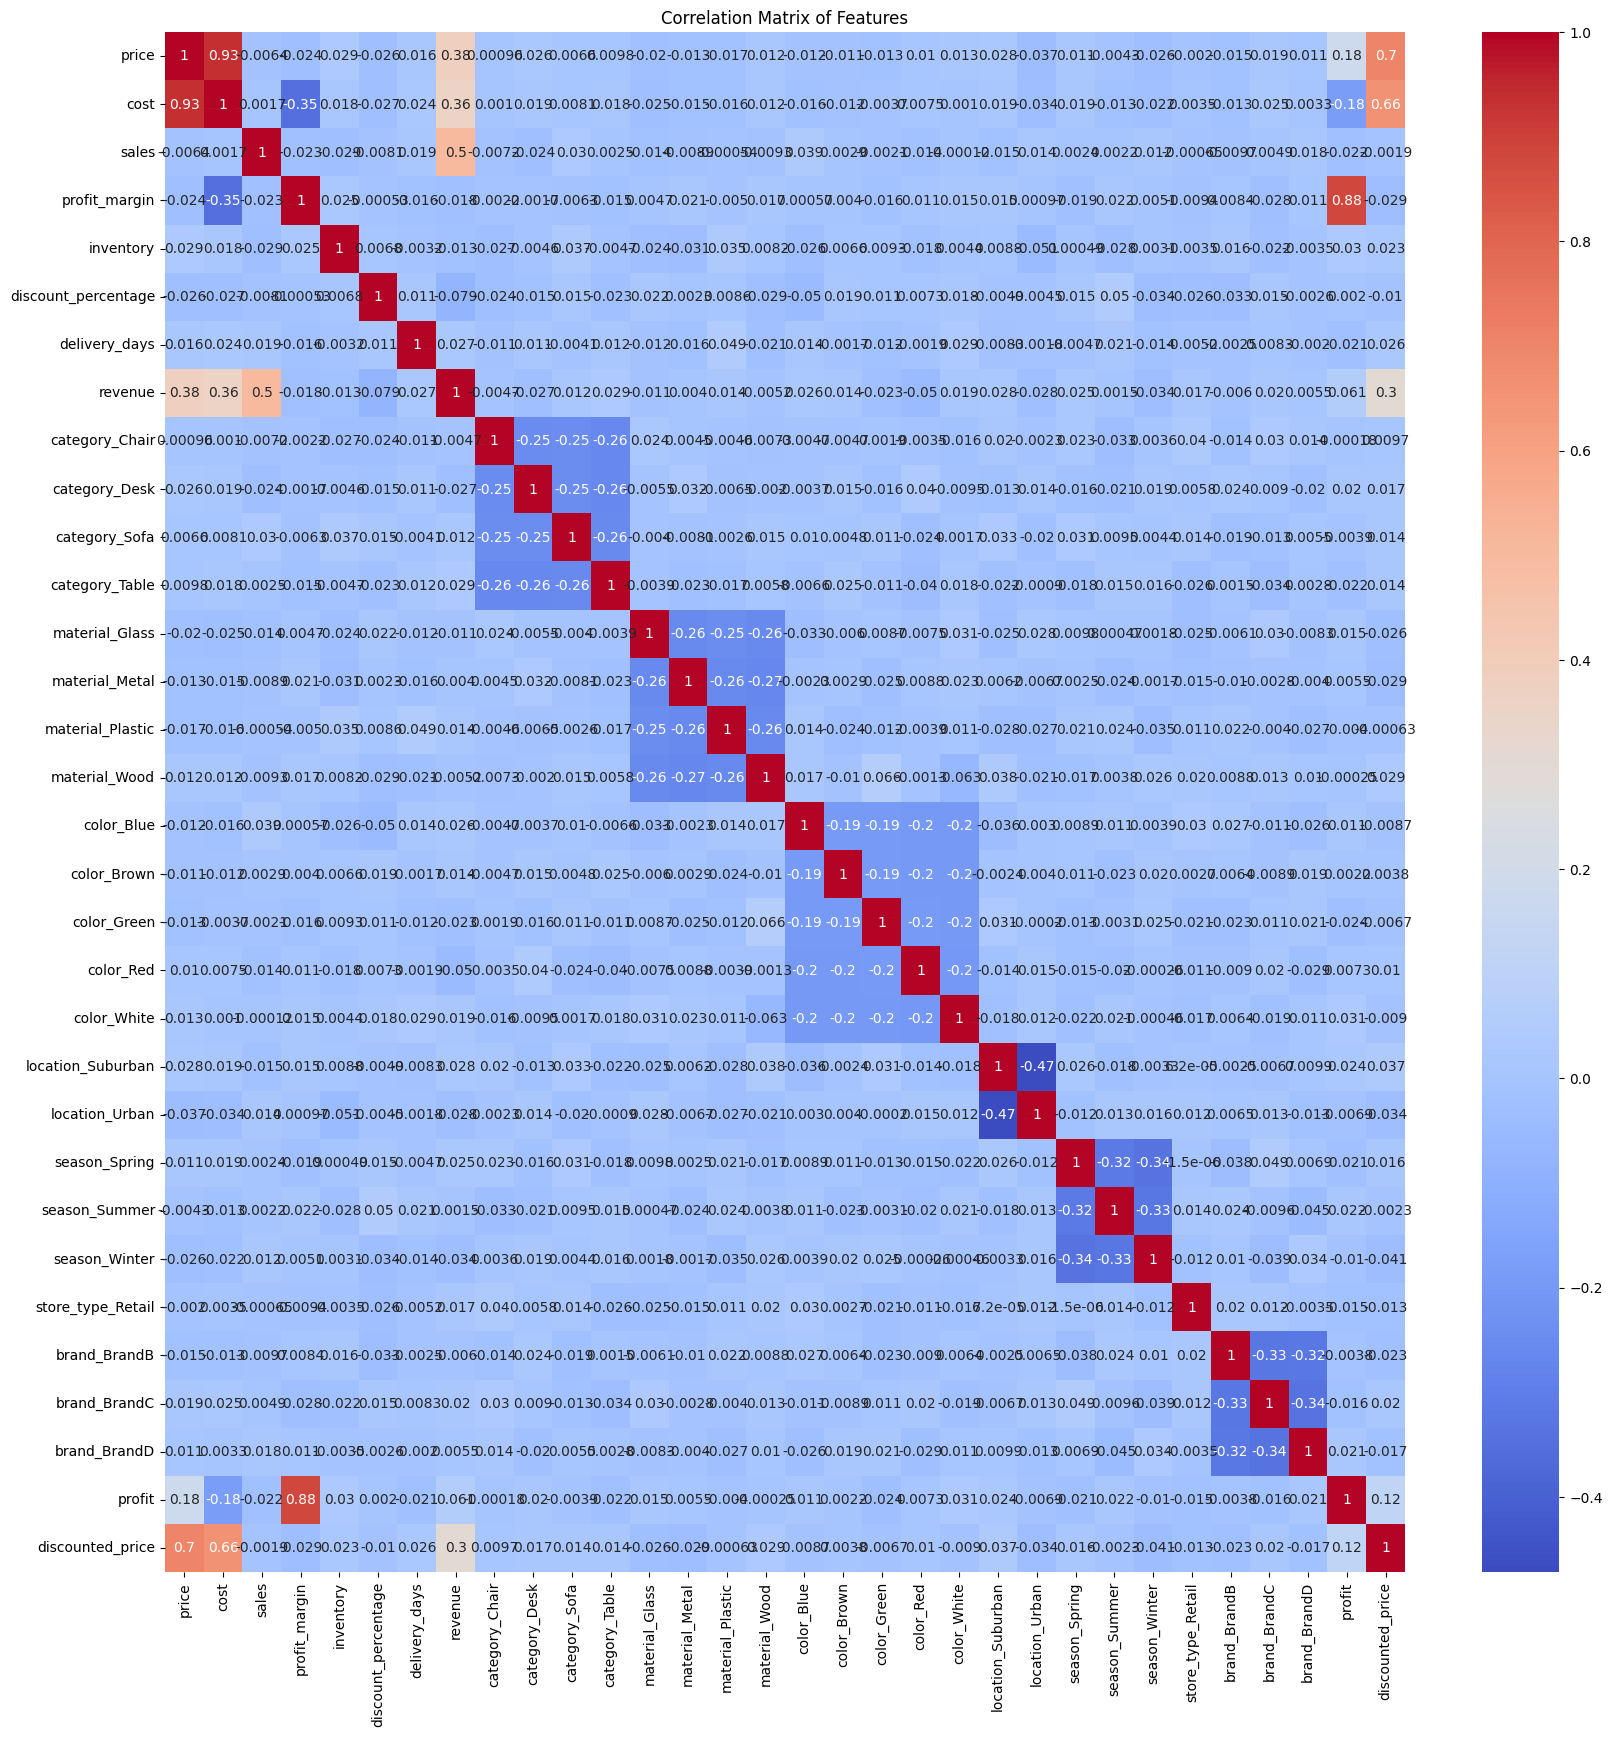

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Features")
plt.show()

In [ ]:
high_corr_pairs = np.where(np.abs(correlation_matrix) > 0.85)

In [ ]:
high_corr_pairs

(array([ 0,  0,  1,  1,  2,  3,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
        14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
        30, 31]),
 array([ 0,  1,  0,  1,  2,  3, 30,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13,
        14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29,  3,
        30, 31]))

In [ ]:
redundant_features = ['profit', 'cost']
df_reduced = df_scaled.drop(columns = redundant_features)

In [ ]:
df_reduced

,price,sales,profit_margin,inventory,discount_percentage,delivery_days,revenue,category_Chair,category_Desk,category_Sofa,...,location_Suburban,location_Urban,season_Spring,season_Summer,season_Winter,store_type_Retail,brand_BrandB,brand_BrandC,brand_BrandD,discounted_price
0,-0.427533,40,-1.153872,0.126455,1.490613,1.604841,3949.165238,False,False,False,...,False,False,True,False,False,False,False,False,False,0.209753
1,1.553623,7,-0.935427,1.636748,1.391688,0.432283,-3521.002258,True,False,False,...,False,False,False,True,False,False,False,False,True,-0.608535
2,0.801561,32,-0.273070,-0.672091,0.812141,-1.131128,14285.560219,False,False,False,...,True,False,False,False,False,False,False,False,True,0.150580
3,0.343091,48,-1.599589,-0.915127,-0.456816,-1.131128,12261.073703,False,False,False,...,False,False,False,True,False,True,False,False,True,0.499820
4,-1.178912,19,1.020630,-1.088724,-1.364744,1.604841,-4588.255733,True,False,False,...,False,False,False,False,False,False,False,False,True,-2.787824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.022532,8,-1.396200,0.074376,-0.598389,1.604841,-3351.943350,True,False,False,...,True,False,False,False,False,True,True,False,False,-0.036014
2496,0.269578,24,1.301850,-1.540076,0.799020,1.213989,-445.621346,False,False,False,...,False,True,False,True,False,True,False,False,True,0.054180
2497,1.260882,48,0.578934,0.508368,-1.407258,0.432283,25809.096038,False,True,False,...,False,False,False,True,False,False,False,False,True,3.035269
2498,1.656863,38,-1.113043,-1.592155,0.560759,-0.349422,18963.246944,False,True,False,...,True,False,False,False,False,True,False,False,False,0.727763


In [ ]:
X_reduced = df_reduced.drop(columns=['revenue', 'sales'])
y = df_reduced[['revenue', 'sales']]

In [ ]:
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

In [ ]:
model_reduced = RandomForestRegressor(random_state=42)
model_reduced.fit(X_train_reduced, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_reduced = model_reduced.predict(X_test_reduced)
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
r2_reduced = r2_score(y_test, y_pred_reduced)
print(f'Reduced Features - Mean Squared Error: {mse_reduced}, R² Score: {r2_reduced}')

Reduced Features - Mean Squared Error: 23336692.210994724, R² Score: 0.012532665616059535


Correlation Matrix is used to see which pairs of features are highly correlated with one another. Redundant Features are dropped from the dataset by dropping one feature from each pair. Then after fitting and training the model and evaluation it is seen that the mse and r2 have greatly improced, especially the r2 which has gone from negative to positive value, and mse also has decreased. Removing the redundant features proved to reduce collinearity between pairs of features , and also made the dataset simpler, which increased the predictive power by decreasing mse and increasing r2.